#             Classification à multi classe avec pytorch

## 1. Importation des modules

In [38]:
import torch
from numpy import *
from matplotlib.pyplot import *
from sklearn.datasets import make_blobs
from torch import nn
from torchsummary import summary

## 2. Création de la data

In [39]:
x, y = make_blobs (1000, 2, centers = 4, cluster_std = 1.5, random_state = 20)

xtrain, ytrain, xtest, ytest = x[:800], y[:800], x[800:], y[800:]

xtrain = torch.tensor (xtrain).type (torch.float32)
ytrain = torch.tensor (ytrain).type (torch.long)
xtest = torch.tensor (xtest).type (torch.float32)
ytest = torch.tensor (ytest).type (torch.long)

print (xtrain.shape, xtest.shape)

torch.Size([800, 2]) torch.Size([200, 2])


## 3. Visualisation de la data

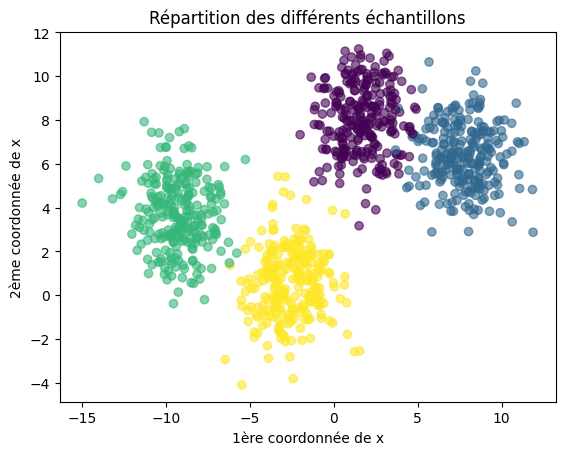

In [40]:
scatter (x[:, 0], x[:, 1], c = y, alpha = 0.6)
title ("Répartition des différents échantillons")
xlabel ("1ère coordonnée de x")
ylabel ("2ème coordonnée de x")
show ()

## 4. Fonctions utiles

In [41]:
def accuracy_fn (ypred, ytrue):
    correct = torch.eq (ypred, ytrue).sum().item()
    return (correct/len (ypred)) * 100

## 5. Création du réseau de neurone

In [42]:
class classification (nn.Module):
    def __init__ (self):
        super ().__init__ ()
        self.layers = nn.Sequential (
            nn.Linear (2, 10),
            nn.ReLU (),
            nn.Linear (10, 10),
            nn.ReLU (),
            nn.Linear (10, 4))

    
    def forward (self, x):
        return self.layers (x)

## 6. Paramètres du modèle

In [43]:
model = classification ()
lossf = nn.CrossEntropyLoss ()
optimizer = torch.optim.Adam (model.parameters (), lr = 0.01)

summary (model, (2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]              30
              ReLU-2                   [-1, 10]               0
            Linear-3                   [-1, 10]             110
              ReLU-4                   [-1, 10]               0
            Linear-5                    [-1, 4]              44
Total params: 184
Trainable params: 184
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## 7. Entrainement du modèle

In [44]:
epochs = 20
trainloss = []
trainaccuracy = []
testloss = []
testaccuracy = []
softmax = nn.Softmax (dim = 1)
pred = []

for epoch in range (epochs):
    
    model.train
    proba = model (xtrain)
    loss = lossf (proba, ytrain)
    trainloss.append (float (loss))
    element = softmax (proba)
    prediction = torch.argmax (element, dim = 1)
    accuracy = accuracy_fn (prediction, ytrain)
    trainaccuracy.append (float (accuracy))

    optimizer.zero_grad ()
    loss.backward ()
    optimizer.step ()

    model.eval ()
    with torch.inference_mode ():
        proba = model (xtest)
        loss = lossf (proba, ytest)
        testloss.append (float (loss))
        element = softmax (proba)
        prediction = torch.argmax (element, dim = 1)
        accuracy = accuracy_fn (prediction, ytest)
        testaccuracy.append (float (accuracy))
    if epoch %30 == 0:
        print (f"epoch : {epoch}, loss : {loss}, accuracy : {accuracy}")

ypred = prediction

print (" ")
print (f"Le modèle offre une précision de {accuracy} pourcent")


epoch : 0, loss : 1.5285584926605225, accuracy : 32.5
 
Le modèle offre une précision de 79.0 pourcent


## 8. Validation du modèle

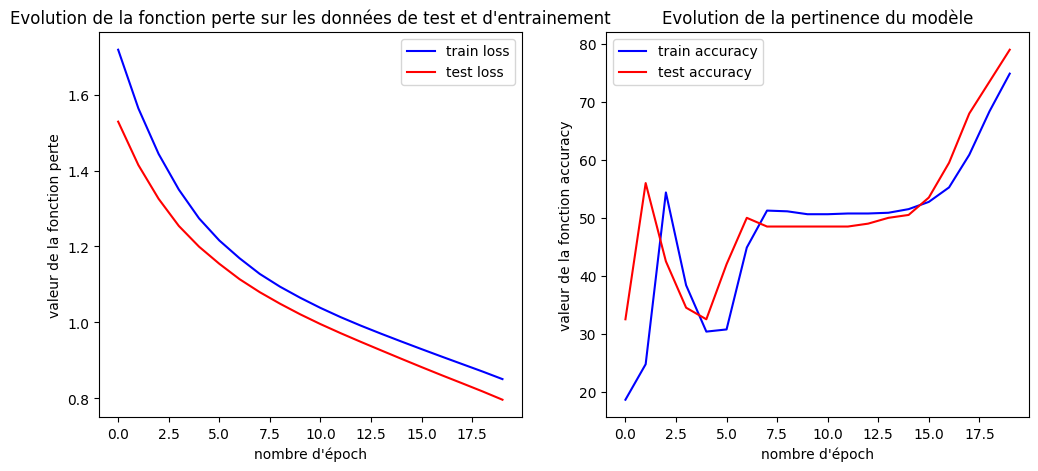

In [45]:
fig, axs = subplots(1, 2, figsize=(12, 5))

axs[0].plot (range (epochs), trainloss, 'b', label = "train loss")
axs[0].plot (range (epochs), testloss, 'r', label = "test loss")
axs[0].set_title ("Evolution de la fonction perte sur les données de test et d'entrainement")
axs[0].set_xlabel ("nombre d'époch")
axs[0].set_ylabel ("valeur de la fonction perte")
axs[0].legend ()

axs[1].plot (range (epochs), trainaccuracy, 'b', label = "train accuracy")
axs[1].plot (range (epochs), testaccuracy, 'r', label = "test accuracy")
axs[1].set_title ("Evolution de la pertinence du modèle")
axs[1].set_xlabel ("nombre d'époch")
axs[1].set_ylabel ("valeur de la fonction accuracy")
axs[1].legend ()

show ()

## 9. Résultats finaux

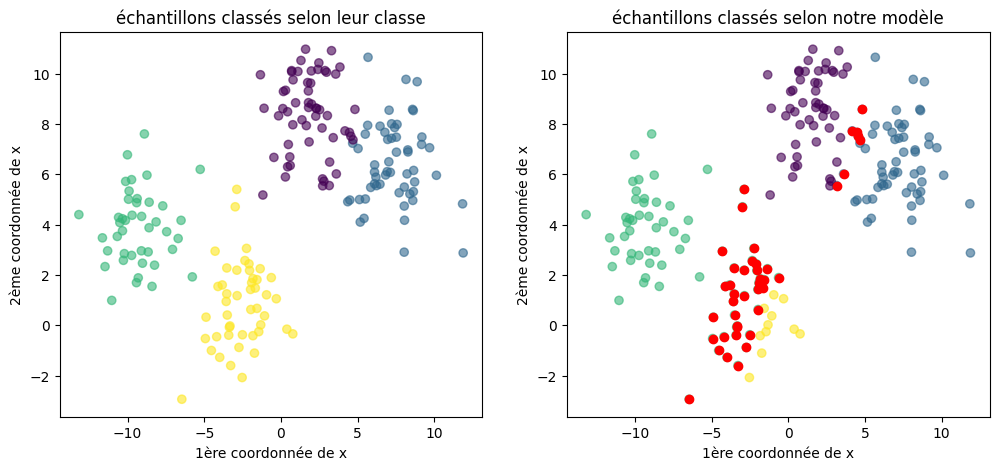

 
Le modèle a commit 42 erreurs sur 200 échantillons de test


In [46]:
a = xtest [ypred!=ytest]
b = ytest [ypred!=ytest]

fig, axs = subplots(1, 2, figsize=(12, 5))

axs[0].scatter (xtest[:, 0], xtest[:, 1], c = ytest, alpha = 0.6)
axs[0].set_title ("échantillons classés selon leur classe")
axs[0].set_xlabel ("1ère coordonnée de x")
axs[0].set_ylabel ("2ème coordonnée de x")

axs[1].scatter (xtest[:, 0], xtest[:, 1], c = ypred, alpha = 0.6)
axs[1].scatter (a[:,0], a[:,1], c = 'r')
axs[1].set_title ("échantillons classés selon notre modèle")
axs[1].set_xlabel ("1ère coordonnée de x")
axs[1].set_ylabel ("2ème coordonnée de x")
show ()

print (" ")
print (f"Le modèle a commit {len (a)} erreurs sur {len (ytest)} échantillons de test")